# FINAL PROJECT BY SAI MITHRAVASU AND ANUSHA EDARA

# Import Necessary Packages

In [2]:
import pandas as pd
import numpy as np


C:\Users\saimi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Loading the Data

In [3]:
df=pd.read_csv("C:/Users/saimi/Downloads/complaints.csv/complaints.csv")
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


# Renaming the Unnamed Column

In [4]:
df.rename(columns={'Unnamed: 0': 'Complaint_No'}, inplace=True)

# Printing the First Cells


In [5]:
df.head()

,Complaint_No,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


#  Printing Unique Values

In [6]:
unique=df["product"].unique()
unique

array(['credit_card', 'retail_banking', 'credit_reporting',
       'mortgages_and_loans', 'debt_collection'], dtype=object)

# Distribution of Complaints and Narrative Lengths

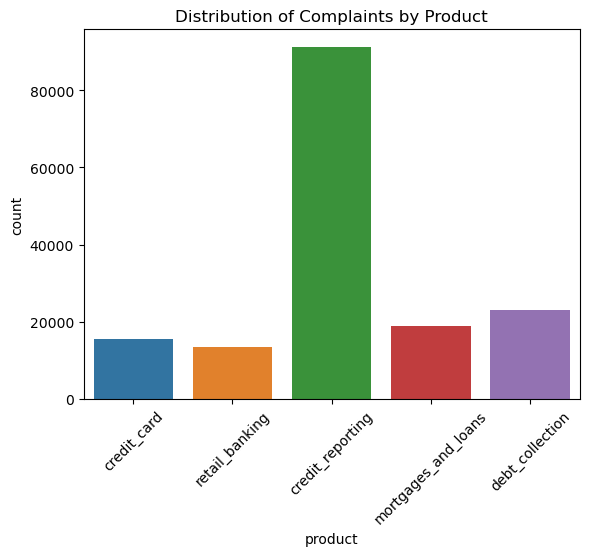

C:\Users\saimi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


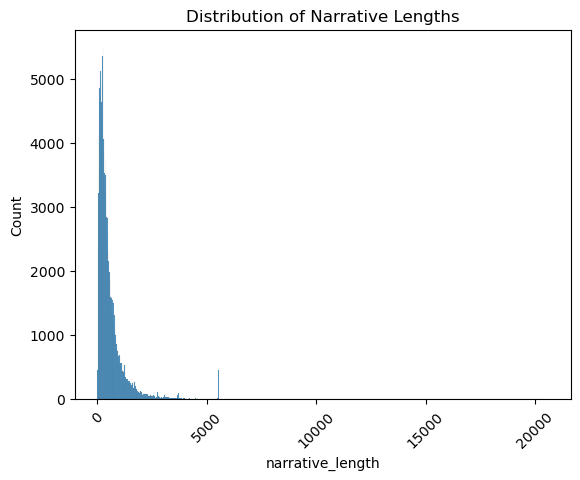

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='product', data=df)
plt.title('Distribution of Complaints by Product')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Histogram of narrative lengths, handling NaN values
df['narrative_length'] = df['narrative'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
sns.histplot(df['narrative_length'])
plt.title('Distribution of Narrative Lengths')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Encoding Product Column

In [8]:
df_encoded = pd.get_dummies(df['product'])
df = pd.concat([df, df_encoded], axis=1)
df.head()

,Complaint_No,product,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,credit_card,purchase order day shipping amount receive pro...,1705,True,False,False,False,False
1,1,credit_card,forwarded message date tue subject please inve...,904,True,False,False,False,False
2,2,retail_banking,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True
3,3,credit_reporting,payment history missing credit report speciali...,903,False,True,False,False,False
4,4,credit_reporting,payment history missing credit report made mis...,851,False,True,False,False,False


# Dropping Product Column 

In [9]:
df = df.drop('product', axis=1)
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True
3,3,payment history missing credit report speciali...,903,False,True,False,False,False
4,4,payment history missing credit report made mis...,851,False,True,False,False,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Complaint_No         162421 non-null  int64 
 1   narrative            162411 non-null  object
 2   narrative_length     162421 non-null  int64 
 3   credit_card          162421 non-null  bool  
 4   credit_reporting     162421 non-null  bool  
 5   debt_collection      162421 non-null  bool  
 6   mortgages_and_loans  162421 non-null  bool  
 7   retail_banking       162421 non-null  bool  
dtypes: bool(5), int64(2), object(1)
memory usage: 4.5+ MB


# Checking for null Values

In [11]:
df.isnull().sum()

Complaint_No            0
narrative              10
narrative_length        0
credit_card             0
credit_reporting        0
debt_collection         0
mortgages_and_loans     0
retail_banking          0
dtype: int64

# Dropping Null Values

In [12]:
df=df.dropna()

In [13]:
df.isnull().sum()

Complaint_No           0
narrative              0
narrative_length       0
credit_card            0
credit_reporting       0
debt_collection        0
mortgages_and_loans    0
retail_banking         0
dtype: int64

# Checking for Duplicate Values

In [14]:
df.duplicated().sum()

0

# Distrubution of Ocuurences

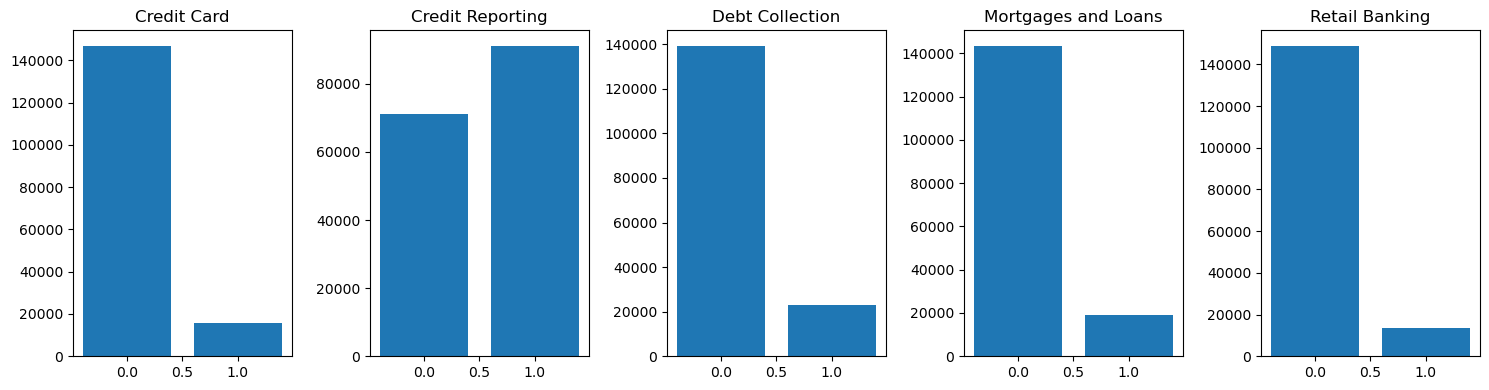

In [15]:
import matplotlib.pyplot as plt
# Count occurrences of each value in each column
counts_credit_card = df["credit_card"].value_counts()
counts_credit_reporting = df["credit_reporting"].value_counts()
counts_debt_collection = df["debt_collection"].value_counts()
counts_mortgages_and_loans = df["mortgages_and_loans"].value_counts()
counts_retail_banking = df["retail_banking"].value_counts()

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 4))

# Plot for 'credit_card' column
axes[0].bar(counts_credit_card.index, counts_credit_card.values)
axes[0].set_title('Credit Card')

# Plot for 'credit_reporting' column
axes[1].bar(counts_credit_reporting.index, counts_credit_reporting.values)
axes[1].set_title('Credit Reporting')

# Plot for 'debt_collection' column
axes[2].bar(counts_debt_collection.index, counts_debt_collection.values)
axes[2].set_title('Debt Collection')

# Plot for 'mortgages_and_loans' column
axes[3].bar(counts_mortgages_and_loans.index, counts_mortgages_and_loans.values)
axes[3].set_title('Mortgages and Loans')

# Plot for 'retail_banking' column
axes[4].bar(counts_retail_banking.index, counts_retail_banking.values)
axes[4].set_title('Retail Banking')

plt.tight_layout()
plt.show()

# Count of each True and False

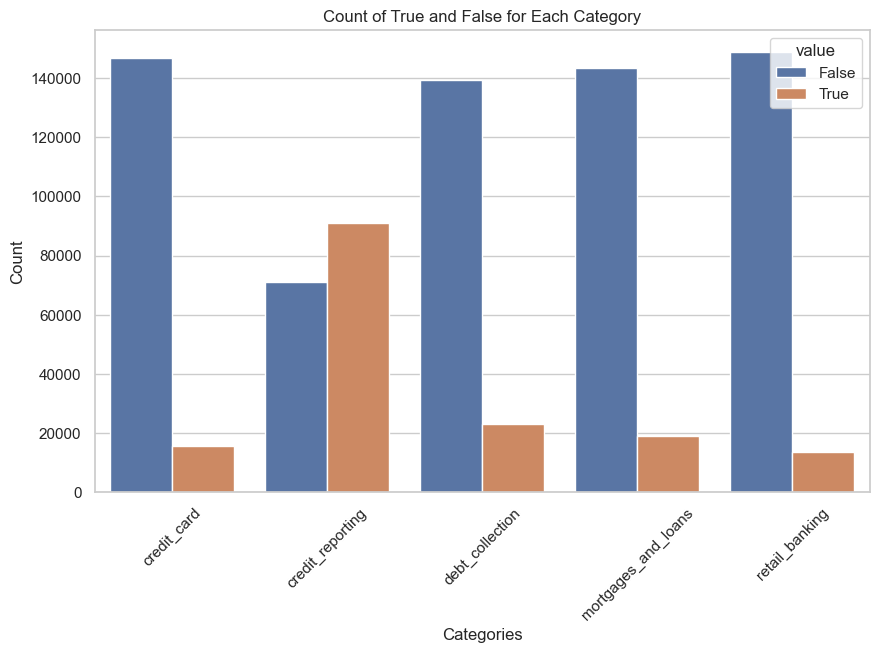

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

df_melted = pd.melt(df, value_vars=["credit_card", "credit_reporting", "debt_collection", "mortgages_and_loans", "retail_banking"])

# Convert the melted values to "True" and "False"
df_melted["value"] = df_melted["value"].astype(bool)

# Create a countplot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="variable", hue="value", data=df_melted)

# Add labels and title
ax.set(xlabel="Categories", ylabel="Count", title="Count of True and False for Each Category")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Converting all naratives to Small case

In [17]:
df["narrative"]=df["narrative"].str.lower()
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True
3,3,payment history missing credit report speciali...,903,False,True,False,False,False
4,4,payment history missing credit report made mis...,851,False,True,False,False,False


In [18]:
!pip install beautifulsoup4

# Removing Tags from narrative 

In [19]:
from bs4 import BeautifulSoup

## check if there is html tags

def has_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return bool(soup.find())

df['has_html_tags'] = df['narrative'].apply(has_html_tags)

In [20]:
count_true = df['has_html_tags'].sum()
count_true

0

In [21]:
!pip install emoji

In [22]:
!pip install regex

# Removing Emojis Using Emoji Function

In [23]:
import regex
import pandas as pd

# Function to check if a string contains emojis using a Unicode character property
def has_emoji(text):
    emoji_pattern = regex.compile(r'\p{Emoji}', flags=regex.UNICODE)
    return bool(emoji_pattern.search(text))


has_emojis =  df['narrative'].apply(has_emoji)

has_emojis

0         False
1         False
2         False
3         False
4         False
          ...  
162416    False
162417    False
162418    False
162419    False
162420    False
Name: narrative, Length: 162411, dtype: bool

In [24]:
has_emojis.sum()

0

# Removing url

In [25]:
import re
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.S+')
    return pattern.sub(r'',text)
df["narrative"]=df["narrative"].apply(remove_url)

df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,has_html_tags
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False,False
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True,False
3,3,payment history missing credit report speciali...,903,False,True,False,False,False,False
4,4,payment history missing credit report made mis...,851,False,True,False,False,False,False


# Removing punctuation 

In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
punc=string.punctuation

In [28]:
def remove_punc(text):
    return text.translate(str.maketrans('', '',punc))

df["narrative"]=df["narrative"].apply(remove_punc)
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,has_html_tags
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False,False
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True,False
3,3,payment history missing credit report speciali...,903,False,True,False,False,False,False
4,4,payment history missing credit report made mis...,851,False,True,False,False,False,False


In [29]:
from nltk.corpus import stopwords

# Removing Stopwords

In [30]:
import nltk
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saimi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

df["narrative"]=df["narrative"].apply(lambda x: remove_stopwords(x))

df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,has_html_tags
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False,False
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True,False
3,3,payment history missing credit report speciali...,903,False,True,False,False,False,False
4,4,payment history missing credit report made mis...,851,False,True,False,False,False,False


# Creating Pipeline

In [44]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize

# Function to apply sentence and word tokenization
def tokenize_text(text):
    words = word_tokenize(text)
    return words

df['Complaint_tokenized_text'] = df['narrative'].apply(tokenize_text)

df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saimi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,has_html_tags,Complaint_tokenized_text,num_tokens
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False,False,"[purchase, order, day, shipping, amount, recei...",1
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False,False,"[forwarded, message, date, tue, subject, pleas...",1
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True,False,"[forwarded, message, cc, sent, friday, pdt, su...",1
3,3,payment history missing credit report speciali...,903,False,True,False,False,False,False,"[payment, history, missing, credit, report, sp...",1
4,4,payment history missing credit report made mis...,851,False,True,False,False,False,False,"[payment, history, missing, credit, report, ma...",1


# Counting Most frequent Words

In [46]:
 # Creating a new column for the number of tokens
#Importing a function Counter
from collections import Counter
df['num_tokens'] = df['Complaint_tokenized_text'].map(len)
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,has_html_tags,Complaint_tokenized_text,num_tokens
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False,False,"[purchase, order, day, shipping, amount, recei...",230
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False,False,"[forwarded, message, date, tue, subject, pleas...",132
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True,False,"[forwarded, message, cc, sent, friday, pdt, su...",173
3,3,payment history missing credit report speciali...,903,False,True,False,False,False,False,"[payment, history, missing, credit, report, sp...",131
4,4,payment history missing credit report made mis...,851,False,True,False,False,False,False,"[payment, history, missing, credit, report, ma...",123


# Top 5 Words

In [47]:
# Printing the 5 most occurred tokens
counter = Counter()
df['Complaint_tokenized_text'].map(counter.update)
print(counter.most_common(5))

[('credit', 317561), ('account', 316151), ('report', 177193), ('information', 143538), ('payment', 127704)]


# Frequency Distribution

In [48]:
# Creating a new data frame for frequency 
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [49]:
# Sorting the freq_df
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
credit,317561
account,316151
report,177193
information,143538
payment,127704
reporting,94522
time,82905
company,79449
would,78230


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

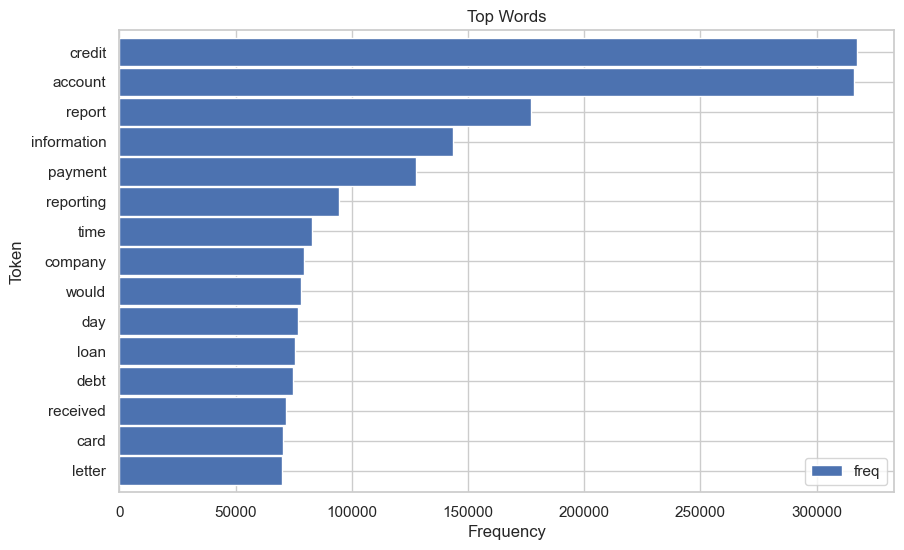

In [50]:
# Plotting a inverted bar graph for most frequent words 
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(10,6),edgecolor ='white')
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

# WorldCloud on Most Frequenct Words

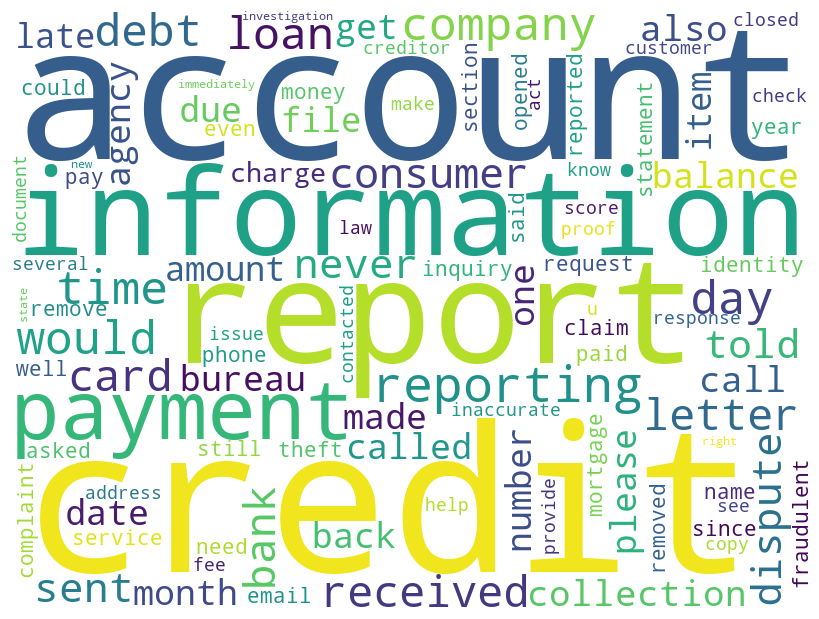

In [52]:
# World cloud on Frequency 
# Importing Worldcloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 800, height=600,max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162411 entries, 0 to 162420
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Complaint_No              162411 non-null  int64 
 1   narrative                 162411 non-null  object
 2   narrative_length          162411 non-null  int64 
 3   credit_card               162411 non-null  bool  
 4   credit_reporting          162411 non-null  bool  
 5   debt_collection           162411 non-null  bool  
 6   mortgages_and_loans       162411 non-null  bool  
 7   retail_banking            162411 non-null  bool  
 8   has_html_tags             162411 non-null  bool  
 9   Complaint_tokenized_text  162411 non-null  object
 10  num_tokens                162411 non-null  int64 
dtypes: bool(6), int64(3), object(2)
memory usage: 12.4+ MB


In [54]:
X = df['narrative'].values

In [55]:
y = np.argmax(df[['credit_card', 'credit_reporting', 'debt_collection', 'mortgages_and_loans', 'retail_banking']].values, axis=1)

# Test Train Split using sklearn

In [56]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=22)

# Building the Model and Printing the Classification Report

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline with a TF-IDF vectorizer and a Multinomial Naive Bayes classifier
model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model1.fit(X_train, y_train)

# Predict on the test set
y_pred = model1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.58      0.67      3075
           1       0.80      0.96      0.87     18284
           2       0.85      0.45      0.59      4569
           3       0.80      0.79      0.79      3759
           4       0.90      0.71      0.79      2796

    accuracy                           0.81     32483
   macro avg       0.83      0.70      0.74     32483
weighted avg       0.82      0.81      0.80     32483



# Printing Cross Validation Score of the Model

In [58]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model1, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")

Cross-Validation Scores: [0.81008528 0.79628717 0.80503048 0.81857644 0.80629272]
Mean Accuracy: 0.81


# Model 2 

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
# Create a pipeline with a CountVectorizer and a Multinomial Naive Bayes classifier
model2 = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model
model2.fit(X_train, y_train)

# Predict on the test set
y_pred = model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.77      0.70      3075
           1       0.92      0.84      0.88     18284
           2       0.72      0.69      0.70      4569
           3       0.71      0.88      0.79      3759
           4       0.79      0.90      0.84      2796

    accuracy                           0.82     32483
   macro avg       0.76      0.82      0.78     32483
weighted avg       0.83      0.82      0.82     32483



# Model 2 Cross Validation Score 

In [60]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model2, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")

Cross-Validation Scores: [0.82135271 0.8099255  0.80355274 0.80995628 0.82005418]
Mean Accuracy: 0.81


# Confusion Matrix

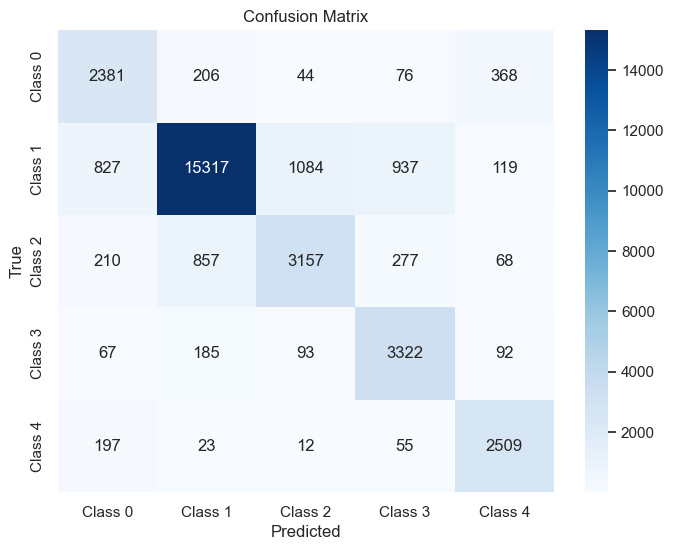

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Sentimental Analysis

In [62]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# Subjectivity and Polarity

In [63]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['narrative'].apply(getSubjectivity)
df['Polarity'] = df['narrative'].apply(getPolarity)

#Now display data
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,has_html_tags,Complaint_tokenized_text,num_tokens,Subjectivity,Polarity
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False,False,"[purchase, order, day, shipping, amount, recei...",230,0.380966,0.050780
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False,False,"[forwarded, message, date, tue, subject, pleas...",132,0.536742,-0.030279
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True,False,"[forwarded, message, cc, sent, friday, pdt, su...",173,0.406609,-0.009483
3,3,payment history missing credit report speciali...,903,False,True,False,False,False,False,"[payment, history, missing, credit, report, sp...",131,0.333864,0.075909
4,4,payment history missing credit report made mis...,851,False,True,False,False,False,False,"[payment, history, missing, credit, report, ma...",123,0.333864,0.075909


# Grouping the Polarity into categories

In [64]:
# Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(50)

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,has_html_tags,Complaint_tokenized_text,num_tokens,Subjectivity,Polarity,Insight
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False,False,"[purchase, order, day, shipping, amount, recei...",230,0.380966,0.050780,Positive
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False,False,"[forwarded, message, date, tue, subject, pleas...",132,0.536742,-0.030279,Negative
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True,False,"[forwarded, message, cc, sent, friday, pdt, su...",173,0.406609,-0.009483,Negative
3,3,payment history missing credit report speciali...,903,False,True,False,False,False,False,"[payment, history, missing, credit, report, sp...",131,0.333864,0.075909,Positive
4,4,payment history missing credit report made mis...,851,False,True,False,False,False,False,"[payment, history, missing, credit, report, ma...",123,0.333864,0.075909,Positive
5,5,payment history missing credit report made mis...,849,False,True,False,False,False,False,"[payment, history, missing, credit, report, ma...",123,0.333864,0.075909,Positive
6,6,va date complaint experian credit bureau invol...,1395,False,True,False,False,False,False,"[va, date, complaint, experian, credit, bureau...",178,0.294133,0.050085,Positive
7,7,account reported abbreviated name full name se...,2114,False,True,False,False,False,False,"[account, reported, abbreviated, name, full, n...",283,0.369286,-0.024048,Negative
8,8,account reported abbreviated name full name se...,2120,False,True,False,False,False,False,"[account, reported, abbreviated, name, full, n...",286,0.369286,-0.024048,Negative
9,9,usdoexxxx account reported abbreviated name fu...,2093,False,True,False,False,False,False,"[usdoexxxx, account, reported, abbreviated, na...",285,0.369286,-0.024048,Negative


In [65]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Visulisation on Sentiment Score

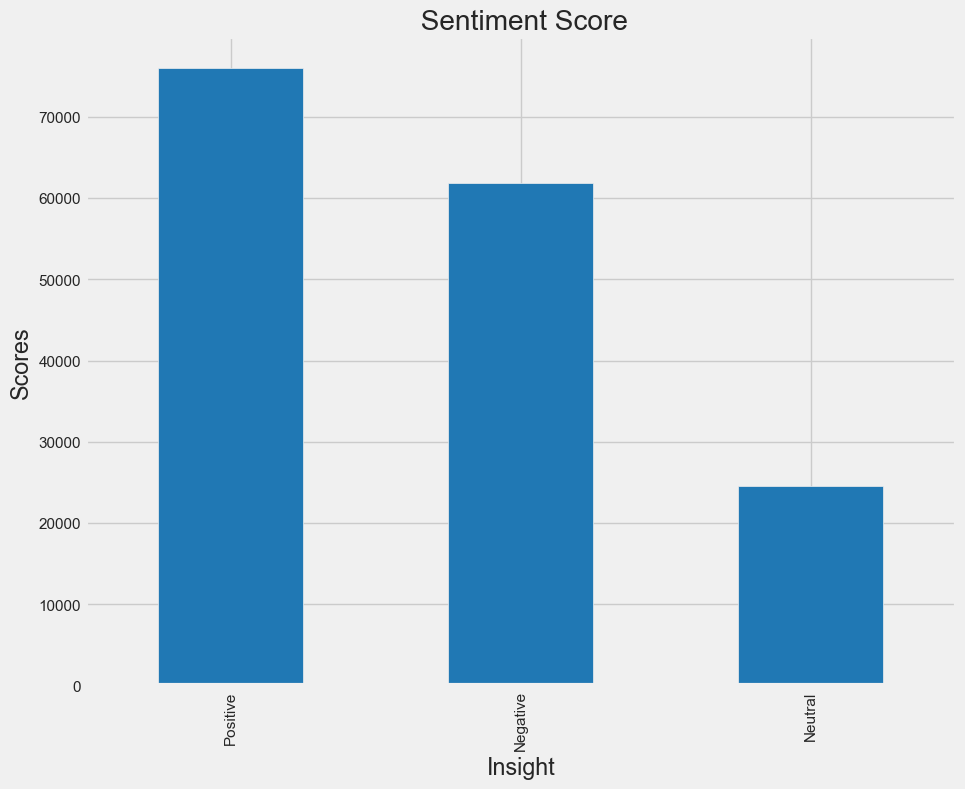

In [68]:
#  Plot the values count of sentiment
plt.title(" Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# WorldCloud on Narrative 

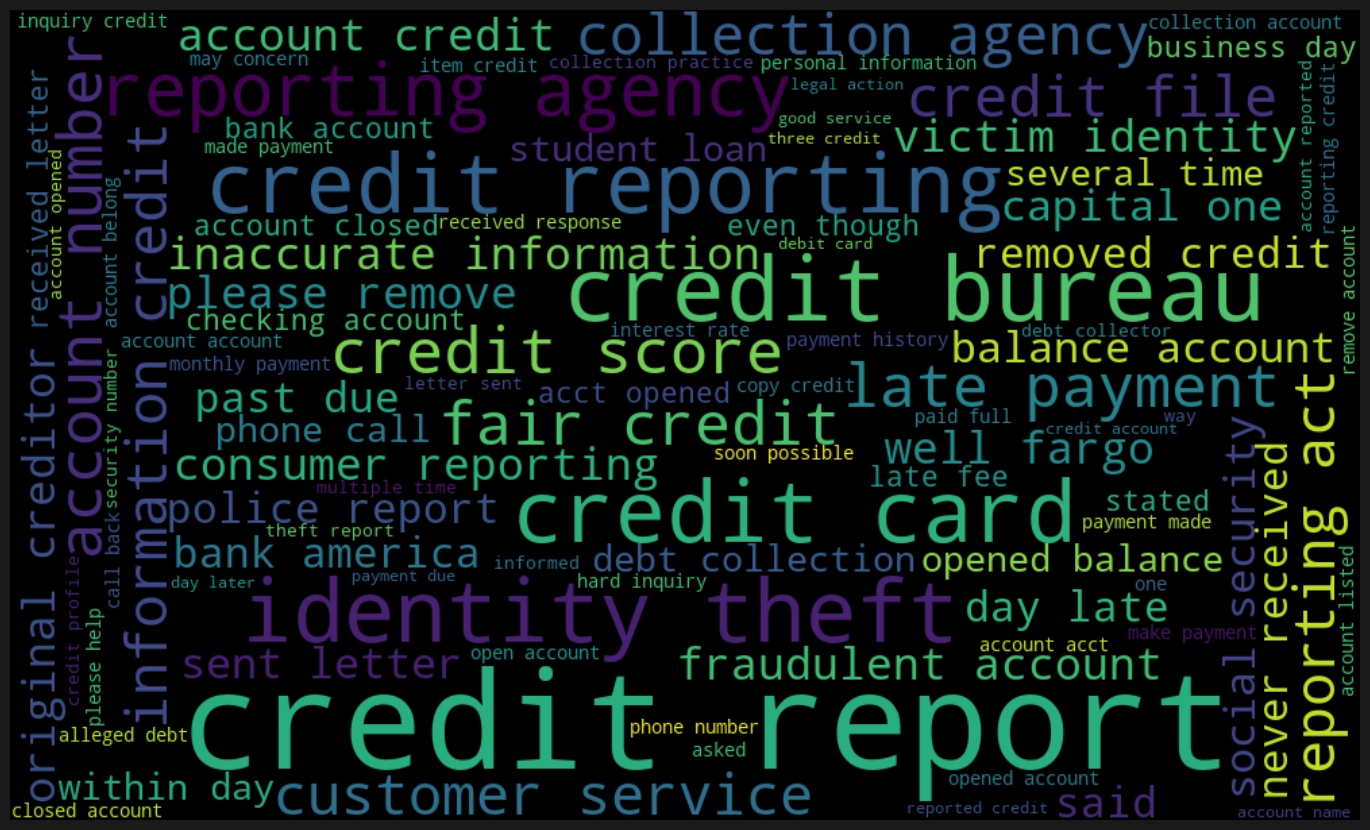

In [67]:
text = ' '.join( [twts for twts in df['narrative']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");